# Kickstarter EDA
## Load data

In [1]:
#Load the Librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_pickle("sample")

In [66]:
print(df.nunique())
print(df.shape)

location_country              203
location_state               1236
location_localized_name     12403
location_name               14118
cbsa_name                     903
top100                          4
backers_count                3580
goal                         5908
pledged                     49808
creator_name               187401
gender                          6
category_broad                 15
category_name                 158
launched_at                228934
deadline                   212094
state_changed_at           215359
state                           5
life                        65184
duration                    78678
prep                       213055
slug                       229158
dtype: int64
(231381, 21)


In [67]:
df.isnull().sum()

location_country            1019
location_state              1069
location_localized_name    52819
location_name               1019
cbsa_name                  60193
top100                     60193
backers_count                  0
goal                           0
pledged                        0
creator_name                   0
gender                         0
category_broad                 0
category_name                  0
launched_at                    0
deadline                       0
state_changed_at               0
state                          0
life                           0
duration                       0
prep                           0
slug                           0
dtype: int64

## Processing

In [68]:
df["launched_year"] = df['launched_at'].dt.year
df['pledged_log'] = np.log(df['pledged']+1)
df['goal_log'] = np.log(df['goal']+1)

## Visualize

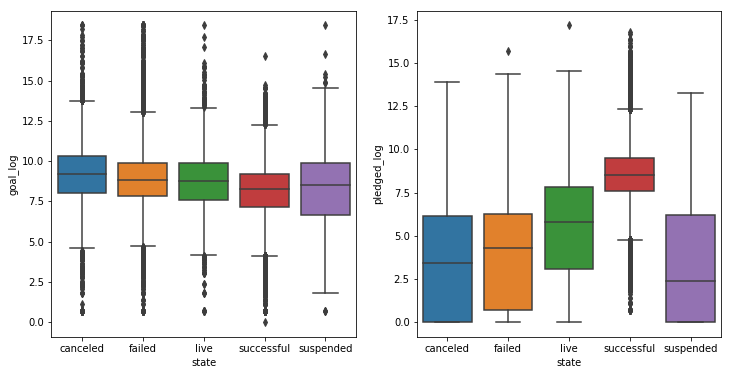

In [69]:
# Do successful projects set a more realistic goal?

plt.figure(figsize=(12,6))

plt.subplot(121)
sns.boxplot(x='state', y="goal_log", data = df)

plt.subplot(122)
sns.boxplot(x='state', y="pledged_log", data = df)

plt.show()

Successful projects on average asked for a smaller goal than cancelled or failed projects. The final pledged amount concentrated between 1000 - 20000

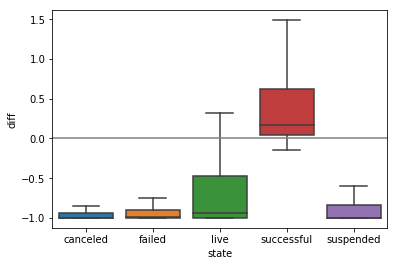

In [70]:
# How much under/over perform?

df['diff'] = df['pledged']/df['goal'] - 1
sns.boxplot(x = 'state', y = 'diff', data = df, showfliers=False)
plt.axhline(0, color="gray")

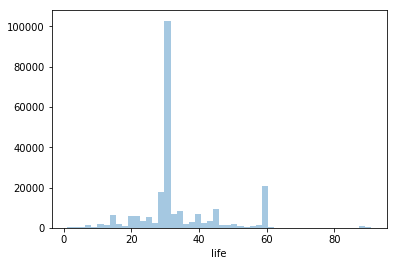

In [71]:
# How much time you need to raise money? 30 or 60 days to choose from. 
sns.distplot(df["life"].dt.days, kde = False)

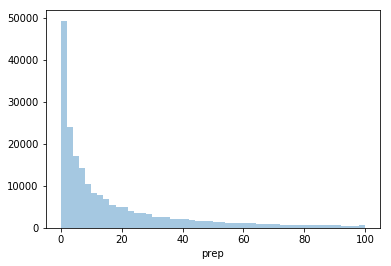

In [72]:
# Duration between the campaign is created and the campaign went live

sns.distplot(df[df['prep'].dt.days <= 100]["prep"].dt.days, kde = False)

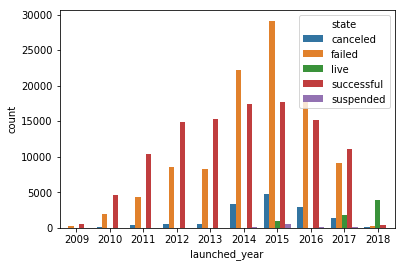

In [73]:
sns.countplot(x='launched_year', data = df, hue='state')
plt.show()

In [74]:
def percentable(df,row,col,axis):
    table = pd.crosstab(df[row],df[col]).apply(lambda r:r/r.sum(), axis = axis).round(2)
    return(table)

In [76]:
# do successful rates change over time? (due to popularity of the platform?)

percentable(df,'state','launched_year',0).style.background_gradient(cmap='viridis')

In [77]:
# which category are more likely to succeed?
percentable(df,'category_broad','state',1).sort_values('successful', ascending = False)

state           canceled  failed  live  successful  suspended
category_broad                                               
dance               0.02    0.19  0.01        0.77       0.00
theater             0.04    0.23  0.01        0.71       0.00
comics              0.05    0.23  0.03        0.69       0.00
design              0.04    0.19  0.10        0.67       0.00
film & video        0.05    0.38  0.02        0.55       0.00
music               0.05    0.39  0.02        0.54       0.00
games               0.05    0.37  0.06        0.52       0.01
photography         0.07    0.45  0.01        0.46       0.01
art                 0.07    0.47  0.02        0.44       0.00
publishing          0.03    0.53  0.03        0.42       0.00
crafts              0.07    0.52  0.02        0.38       0.01
food                0.08    0.58  0.02        0.32       0.01
fashion             0.10    0.57  0.04        0.29       0.01
technology          0.12    0.59  0.03        0.25       0.01
journalism          0.08    0.66  0.01        0.24       0.01

In [78]:
# Do success rates vary by perception of gender?
percentable(df,'state','gender',0).style.background_gradient(cmap='viridis')

In [64]:
# Does US exhibit different patterns?
percentable(df[df.location_country == "US"],'state','gender',0).style.background_gradient(cmap='viridis')

In [79]:
# which MSA has the highest rate of success?
percentable(df[df.top100 ==1],'cbsa_name','state',1).sort_values('successful', ascending=False)

state                                        canceled  failed  live  \
cbsa_name                                                             
San Francisco-Oakland-Hayward, CA                0.05    0.29  0.02   
Portland-Vancouver-Hillsboro, OR-WA              0.05    0.31  0.02   
Boston-Cambridge-Newton, MA-NH                   0.04    0.32  0.02   
New York-Newark-Jersey City, NY-NJ-PA            0.05    0.32  0.02   
Austin-Round Rock, TX                            0.05    0.33  0.02   
Seattle-Tacoma-Bellevue, WA                      0.05    0.33  0.03   
Springfield, MA                                  0.04    0.35  0.02   
Madison, WI                                      0.03    0.37  0.03   
Minneapolis-St. Paul-Bloomington, MN-WI          0.05    0.37  0.02   
Providence-Warwick, RI-MA                        0.05    0.37  0.02   
New Orleans-Metairie, LA                         0.06    0.37  0.02   
Syracuse, NY                                     0.04    0.42  0.00   
Chicago-Naperville-Elgin, IL-IN-WI               0.05    0.38  0.02   
Provo-Orem, UT                                   0.06    0.36  0.04   
Los Angeles-Long Beach-Anaheim, CA               0.06    0.38  0.02   
Tucson, AZ                                       0.05    0.41  0.01   
San Jose-Sunnyvale-Santa Clara, CA               0.06    0.39  0.02   
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD      0.06    0.40  0.02   
Pittsburgh, PA                                   0.05    0.42  0.02   
Albany-Schenectady-Troy, NY                      0.06    0.41  0.02   
Rochester, NY                                    0.06    0.42  0.02   
New Haven-Milford, CT                            0.06    0.43  0.02   
Grand Rapids-Wyoming, MI                         0.05    0.44  0.01   
Milwaukee-Waukesha-West Allis, WI                0.03    0.45  0.04   
Ogden-Clearfield, UT                             0.06    0.41  0.04   
Bridgeport-Stamford-Norwalk, CT                  0.06    0.43  0.03   
Salt Lake City, UT                               0.06    0.43  0.03   
Richmond, VA                                     0.05    0.43  0.03   
Baltimore-Columbia-Towson, MD                    0.06    0.45  0.02   
Hartford-West Hartford-East Hartford, CT         0.07    0.43  0.02   
...                                               ...     ...   ...   
Baton Rouge, LA                                  0.07    0.53  0.03   
Winston-Salem, NC                                0.06    0.54  0.04   
Las Vegas-Henderson-Paradise, NV                 0.09    0.53  0.03   
Lakeland-Winter Haven, FL                        0.09    0.51  0.04   
Orlando-Kissimmee-Sanford, FL                    0.07    0.55  0.03   
Bakersfield, CA                                  0.04    0.58  0.04   
San Antonio-New Braunfels, TX                    0.09    0.54  0.03   
Colorado Springs, CO                             0.07    0.57  0.02   
Atlanta-Sandy Springs-Roswell, GA                0.07    0.57  0.03   
Tampa-St. Petersburg-Clearwater, FL              0.07    0.58  0.02   
Wichita, KS                                      0.08    0.57  0.03   
Memphis, TN-MS-AR                                0.05    0.61  0.02   
Jackson, MS                                      0.08    0.56  0.03   
Charlotte-Concord-Gastonia, NC-SC                0.07    0.59  0.03   
Scranton--Wilkes-Barre--Hazleton, PA             0.07    0.57  0.06   
Houston-The Woodlands-Sugar Land, TX             0.09    0.57  0.03   
Louisville/Jefferson County, KY-IN               0.11    0.58  0.00   
Virginia Beach-Norfolk-Newport News, VA-NC       0.06    0.59  0.03   
Riverside-San Bernardino-Ontario, CA             0.07    0.59  0.03   
Raleigh, NC                                      0.10    0.58  0.01   
Palm Bay-Melbourne-Titusville, FL                0.10    0.56  0.02   
El Paso, TX                                      0.09    0.56  0.05   
Miami-Fort Lauderdale-West Palm Beach, FL        0.09    0.58  0.03   
Jacksonville, FL        

In [41]:
# df_USA = df[df.location_country == "US"]
# df_USA.to_csv('kickstarter.csv')